#PREPARAÇÃO DO AMBIENTE

In [ ]:
#importando as bibliotecas python.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [ ]:
from google.colab import drive

# MONTA NO GOOGLE DRIVE.
drive.mount('/content/drive')

# CARREGA O ARQUIVO.
dataset1 = '/content/drive/MyDrive/estatistica_indutiva/dataset1.csv'
df = pd.read_csv(dataset1)
dataset2 = '/content/drive/MyDrive/estatistica_indutiva/dataset2.csv'
df2 = pd.read_csv(dataset2)

Mounted at /content/drive


#LIMPEZA E TRATAMENTO DOS DADOS

In [ ]:
df.shape

(20640, 10)

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.reset_index(inplace = True, drop = True)

In [ ]:
dummies = pd.get_dummies(df['ocean_proximity'])
df = pd.concat([df, dummies], axis = 1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,False,False,False,True,False


In [ ]:
df = df.drop(['ocean_proximity'], axis = 1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


In [ ]:
df[['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']] = df[['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']].astype(int)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [ ]:
df.describe().round(4)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,20433.0000,20433.0000,20433.0000,20433.0000,20433.0000,20433.0000,20433.0000,20433.0000,20433.0000,20433.0000,20433.0000,20433.0000,20433.0000,20433.0000
mean,-119.5707,35.6332,28.6331,2636.5042,537.8706,1424.9469,499.4335,3.8712,206864.4132,0.4421,0.3179,0.0002,0.1111,0.1286
std,2.0036,2.1363,12.5918,2185.2696,421.3851,1133.2085,382.2992,1.8993,115435.6671,0.4967,0.4657,0.0156,0.3143,0.3348
min,-124.3500,32.5400,1.0000,2.0000,1.0000,3.0000,1.0000,0.4999,14999.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,-121.8000,33.9300,18.0000,1450.0000,296.0000,787.0000,280.0000,2.5637,119500.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,-118.4900,34.2600,29.0000,2127.0000,435.0000,1166.0000,409.0000,3.5365,179700.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,-118.0100,37.7200,37.0000,3143.0000,647.0000,1722.0000,604.0000,4.7440,264700.0000,1.0000,1.0000,0.0000,0.0000,0.0000
max,-114.3100,41.9500,52.0000,39320.0000,6445.0000,35682.0000,6082.0000,15.0001,500001.0000,1.0000,1.0000,1.0000,1.0000,1.0000


#CORRELAÇÃO

In [ ]:
df.corr().round(4)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.0000,-0.9246,-0.1094,0.0455,0.0696,0.1003,0.0565,-0.0156,-0.0454,0.3208,-0.0553,0.0095,-0.4747,0.0462
latitude,-0.9246,1.0000,0.0119,-0.0367,-0.0670,-0.1090,-0.0718,-0.0796,-0.1446,-0.4469,0.3511,-0.0167,0.3588,-0.1613
housing_median_age,-0.1094,0.0119,1.0000,-0.3606,-0.3205,-0.2958,-0.3028,-0.1183,0.1064,0.0456,-0.2370,0.0171,0.2561,0.0208
total_rooms,0.0455,-0.0367,-0.3606,1.0000,0.9304,0.8573,0.9190,0.1979,0.1333,-0.0038,0.0265,-0.0076,-0.0236,-0.0087
total_bedrooms,0.0696,-0.0670,-0.3205,0.9304,1.0000,0.8777,0.9797,-0.0077,0.0497,0.0183,-0.0065,-0.0044,-0.0199,0.0007
population,0.1003,-0.1090,-0.2958,0.8573,0.8777,1.0000,0.9072,0.0051,-0.0253,0.0734,-0.0196,-0.0105,-0.0615,-0.0235
households,0.0565,-0.0718,-0.3028,0.9190,0.9797,0.9072,1.0000,0.0134,0.0649,0.0419,-0.0383,-0.0091,-0.0113,0.0021
median_income,-0.0156,-0.0796,-0.1183,0.1979,-0.0077,0.0051,0.0134,1.0000,0.6884,0.1687,-0.2375,-0.0093,0.0567,0.0274
median_house_value,-0.0454,-0.1446,0.1064,0.1333,0.0497,-0.0253,0.0649,0.6884,1.0000,0.2576,-0.4848,0.0235,0.1605,0.1404
<1H OCEAN,0.3208,-0.4469,0.0456,-0.0038,0.0183,0.0734,0.0419,0.1687,0.2576,1.0000,-0.6078,-0.0139,-0.3147,-0.3420


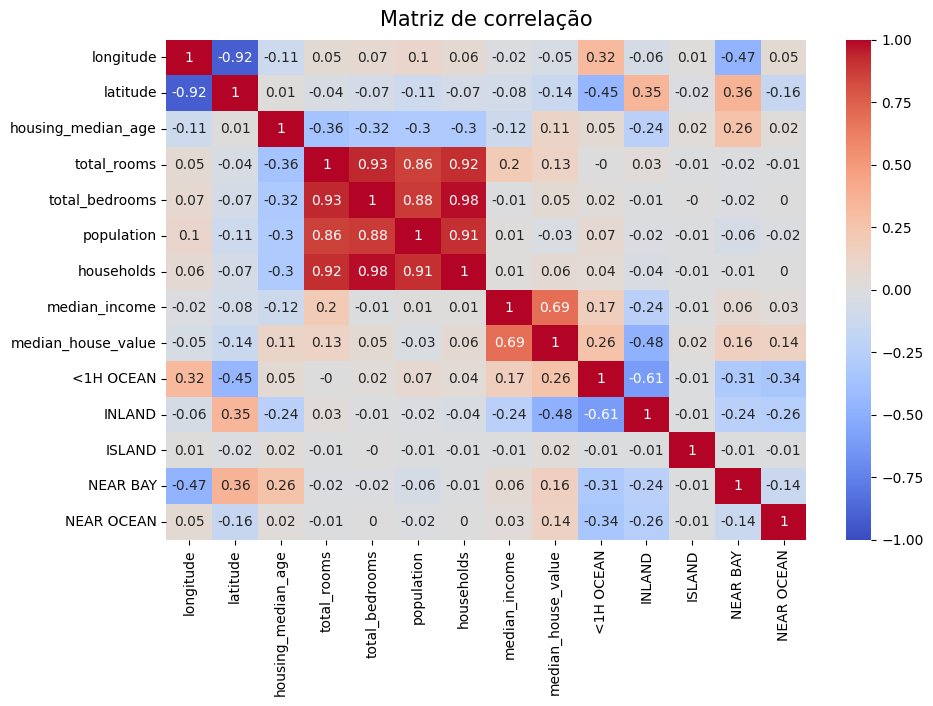

In [ ]:
#heatmap
fig = plt.figure(figsize=(8, 5))
ax = fig.add_axes([0, 0, 1, 1])

sns.heatmap(df.corr().round(2), annot=True, vmin=-1, vmax=1, cmap='coolwarm')
ax.set_title('Matriz de correlação', fontsize=15, pad=10)
plt.show()

In [ ]:
#calculo correlação
corre = df['total_bedrooms'].corr(df['households'])
print(f"Correlação entre 'total_bedrooms' e 'households': {corre}")

Correlação entre 'total_bedrooms' e 'households': 0.9797282708045647


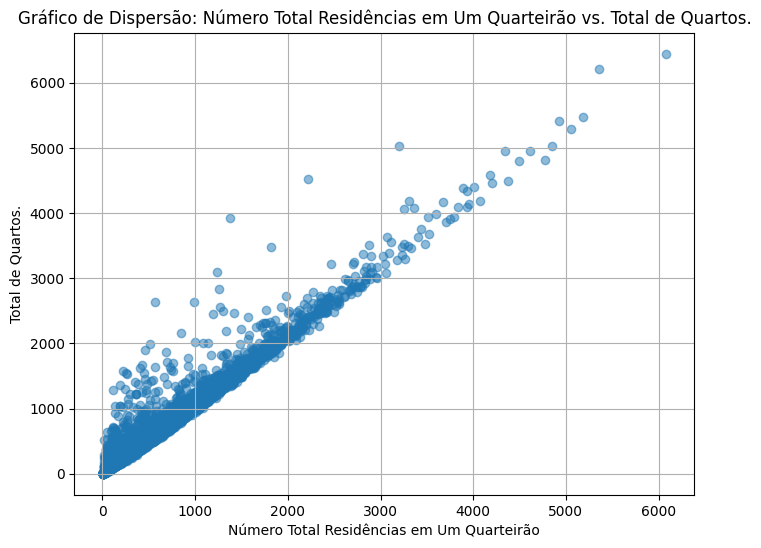

In [ ]:
#grafico dispersão linear
plt.figure(figsize=(8, 6))
plt.scatter(df['households'], df['total_bedrooms'], alpha=0.5)
plt.title('Gráfico de Dispersão: Número Total Residências em Um Quarteirão vs. Total de Quartos.')
plt.xlabel('Número Total Residências em Um Quarteirão')
plt.ylabel('Total de Quartos.')
plt.grid(True)
plt.show()

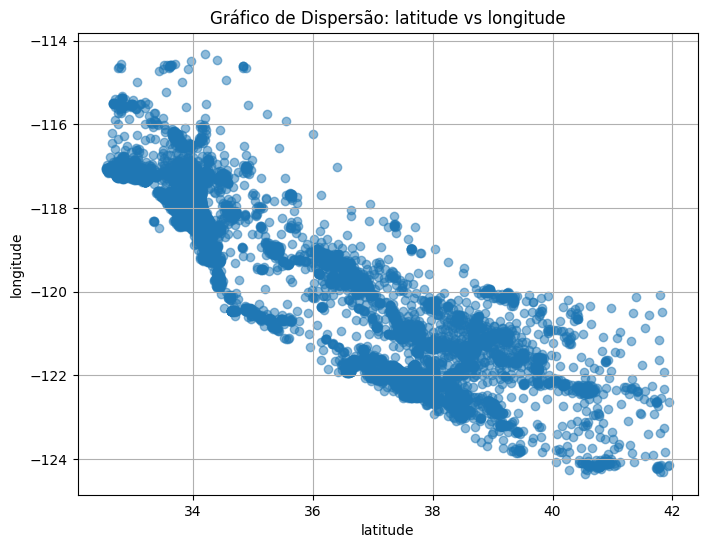

In [ ]:
#grafico dispersão linear
plt.figure(figsize=(8, 6))
plt.scatter(df['latitude'], df['longitude'], alpha=0.5)
plt.title('Gráfico de Dispersão: latitude vs longitude')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.grid(True)
plt.show()

#REGRESSÃO LINEAR MONOVARIADA

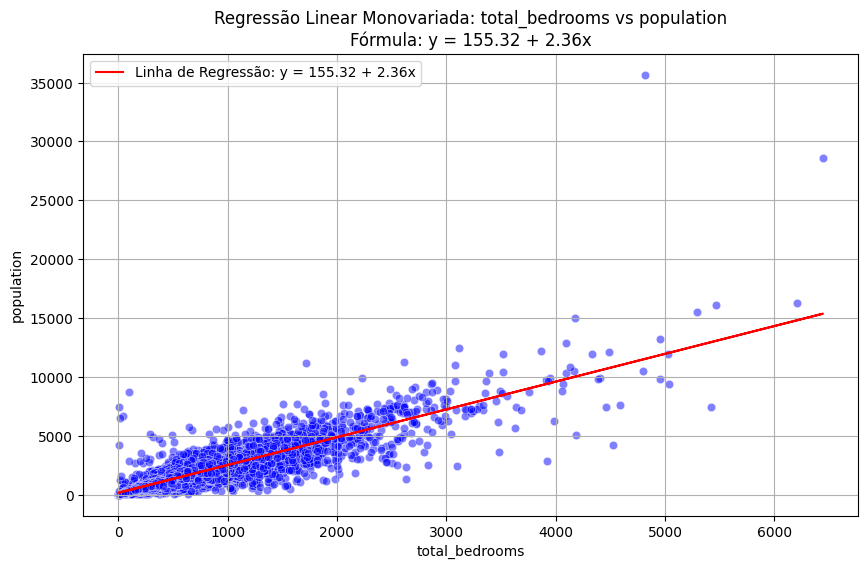

In [ ]:
#variáveis
x_variable = 'total_bedrooms'
y_variable = 'population'

# Preparação dos dados
X = df[[x_variable]]
y = df[y_variable]

#cria e ajusta o modelo de regressão linear
model = LinearRegression()
model.fit(X, y)

#coeficientes de regressão
intercept = model.intercept_
slope = model.coef_[0]

#gera valores preditos
y_pred = model.predict(X)

#plot gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df[x_variable], y=df[y_variable], color="blue", alpha=0.5)
plt.plot(df[x_variable], y_pred, color="red", label=f'Linha de Regressão: y = {intercept:.2f} + {slope:.2f}x')
plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.title(f'Regressão Linear Monovariada: {x_variable} vs {y_variable}\nFórmula: y = {intercept:.2f} + {slope:.2f}x')
plt.legend()
plt.grid(True)
plt.show()


#REGRESSÃO LINEAR MULTIVARIADA

In [ ]:
y = df['population']

In [ ]:
X = df[['households', 'total_bedrooms']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 21)

In [ ]:
X_train_constante = sm.add_constant(X_train)

In [ ]:
modelo_statsmodels = sm.OLS(y_train, X_train_constante, hasconst = True).fit()

In [ ]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:             population   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                 3.663e+04
Date:                Thu, 06 Jun 2024   Prob (F-statistic):               0.00
Time:                        00:58:52   Log-Likelihood:            -1.2425e+05
No. Observations:               16346   AIC:                         2.485e+05
Df Residuals:                   16343   BIC:                         2.485e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             91.0203      6.230     14.

In [ ]:
modelo = LinearRegression()

In [ ]:
modelo.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(4)))

R² = 0.8176


In [ ]:
y_previsto = modelo.predict(X_test)

In [ ]:
print('R² = {}'.format(metrics.r2_score(y_test, y_previsto).round(4)))

R² = 0.8594


In [ ]:
entrada = X_test[0:1]
entrada

,households,total_bedrooms
524,567.0,566.0


In [ ]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(4)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(4)
R2 = metrics.r2_score(y_test, y_previsto).round(4)

print('O modelo possui erro quadrático médio de {0:.2f}'.format(EQM))
print('O modelo possui raíz do erro quadrático médio de {0:.2f}'.format(REQM))
print('O modelo possui coeficiente de determinação de {0:.2f}%'.format(R2 * 100))

O modelo possui erro quadrático médio de 179964.65
O modelo possui raíz do erro quadrático médio de 424.22
O modelo possui coeficiente de determinação de 85.94%


In [ ]:
y_previsto_train = modelo.predict(X_train)

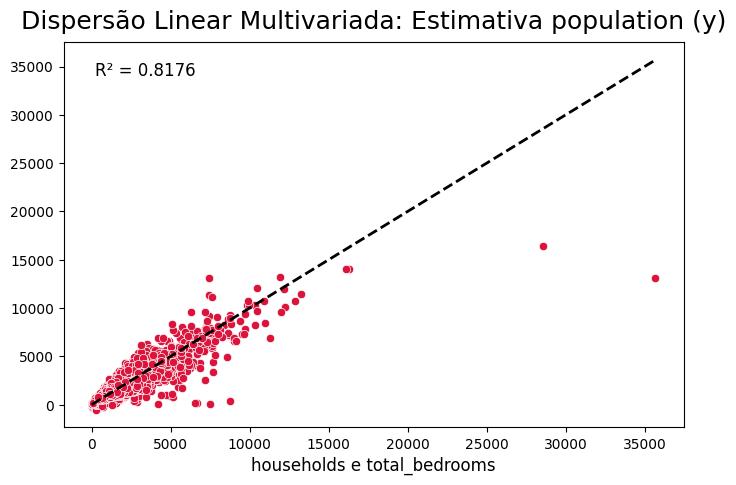

In [ ]:
#linha regressão linear
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)

#calcula r² (já foi feito anterior)
r_squared = r2_score(y_train, y_pred_train)

#plota gráfico
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_train, y=y_pred_train, color='crimson')
plt.title('Dispersão Linear Multivariada: Estimativa population (y)', fontsize=18, pad=10)
plt.xlabel('households e total_bedrooms', fontsize=12)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.text(0.05, 0.95, f'R² = {r_squared:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.show()

#SERIES TEMPORAIS



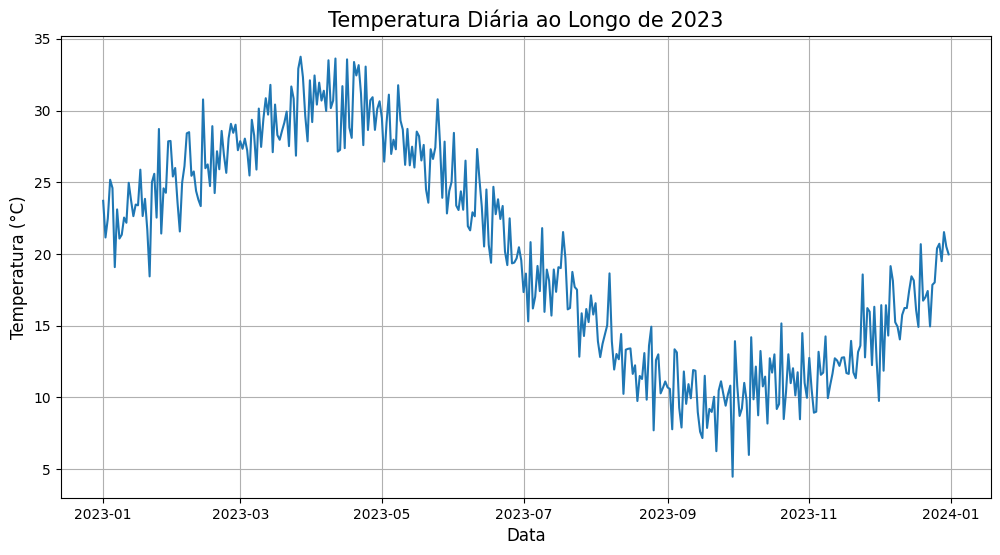

In [ ]:
#gerando dados de exemplo para a série temporal
np.random.seed(0)
dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
temperature = 20 + 10 * np.sin(2 * np.pi * dates.dayofyear / 365) + np.random.normal(0, 2, len(dates))

#cria dataframe com os dados
df_temp = pd.DataFrame({'Date': dates, 'Temperature': temperature})

#plota gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_temp['Date'], df_temp['Temperature'], color='tab:blue')
plt.title('Temperatura Diária ao Longo de 2023', fontsize=15)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Temperatura (°C)', fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
df2.head()

,data,valor
0,1993-01-01,66168
1,1993-02-01,73042
2,1993-03-01,98691
3,1993-04-01,88839
4,1993-05-01,101055


In [ ]:
print(df2.columns)

Index(['data;"valor"'], dtype='object')


In [ ]:
df2 = pd.read_csv(dataset2, sep=';')

In [ ]:
df2.head()

,data,valor
0,01/01/1993,66168
1,01/02/1993,73042
2,01/03/1993,98691
3,01/04/1993,88839
4,01/05/1993,101055


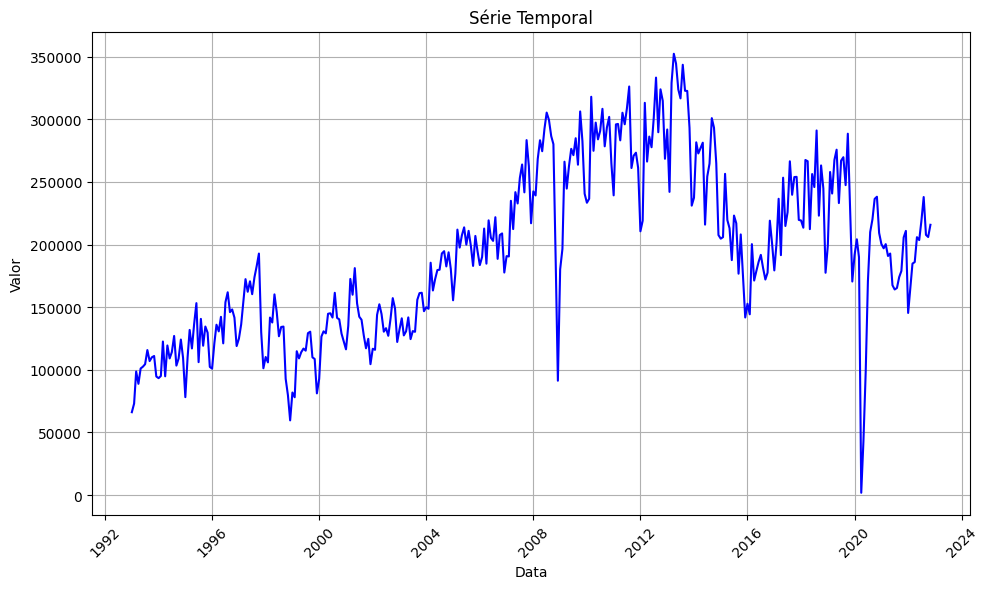

In [ ]:
#carregar o dataset
dataset2 = '/content/drive/MyDrive/estatistica_indutiva/dataset2.csv'
df2 = pd.read_csv(dataset2, sep=';')
df2['data'] = pd.to_datetime(df2['data'], format='%d/%m/%Y')

#plotar o gráfico da série temporal
plt.figure(figsize=(10, 6))
plt.plot(df2['data'], df2['valor'], color='blue')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Série Temporal')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

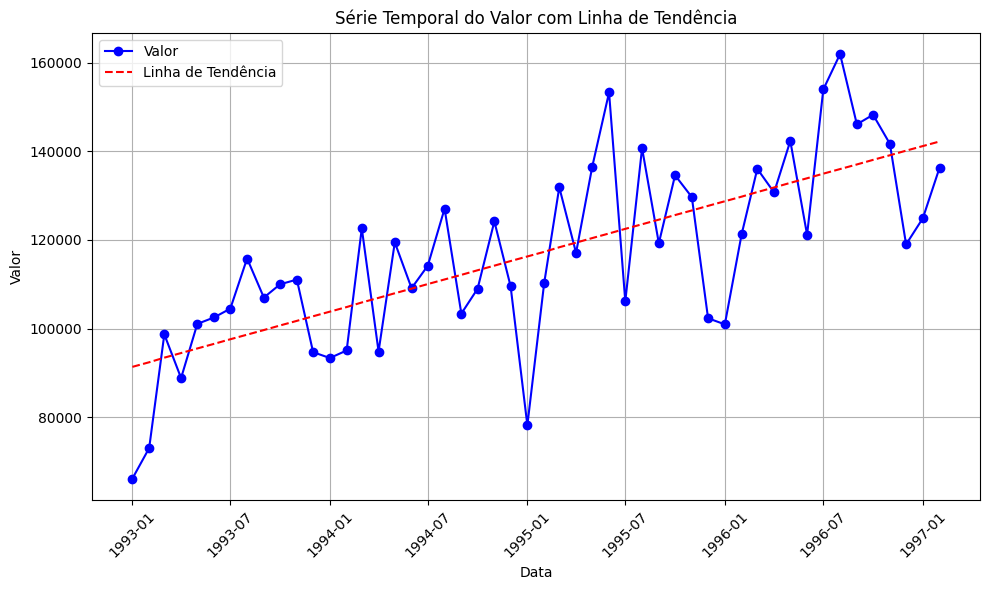

In [ ]:
dataset2 = '/content/drive/MyDrive/estatistica_indutiva/dataset2.csv'
df2 = pd.read_csv(dataset2, sep=';', nrows=50)

df2['data'] = pd.to_datetime(df2['data'], format='%d/%m/%Y')

df2.set_index('data', inplace=True)

#linha tendencia
x = np.arange(len(df2))
y = df2['valor']
m, b = np.polyfit(x, y, 1)

#gráfico
plt.figure(figsize=(10, 6))
plt.plot(df2.index, df2['valor'], marker='o', color='blue', linestyle='-', label='Valor')
plt.plot(df2.index, m*x + b, linestyle='--', color='red', label='Linha de Tendência')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Série Temporal do Valor com Linha de Tendência')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

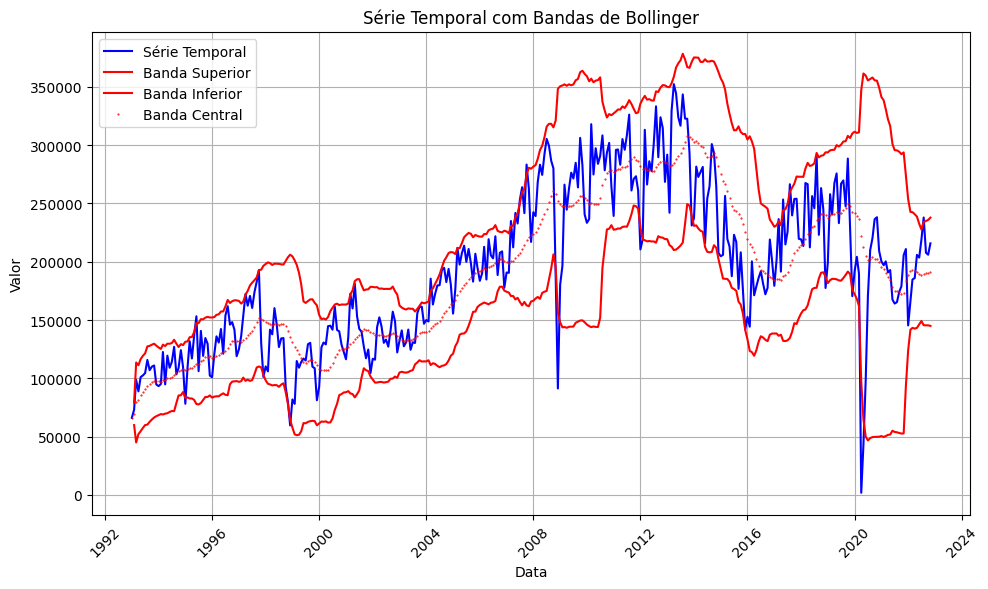

In [ ]:
dataset2 = '/content/drive/MyDrive/estatistica_indutiva/dataset2.csv'
df2 = pd.read_csv(dataset2, sep=';')
df2['data'] = pd.to_datetime(df2['data'], format='%d/%m/%Y')
df2.set_index('data', inplace=True)

window = 20
df2['std'] = df2['valor'].rolling(window=window, min_periods=1).std()

df2['mavg'] = df2['valor'].rolling(window=window, min_periods=1).mean()
df2['upper_band'] = df2['mavg'] + 2 * df2['std']
df2['lower_band'] = df2['mavg'] - 2 * df2['std']

plt.figure(figsize=(10, 6))
plt.plot(df2.index, df2['valor'], label='Série Temporal', color='blue')
plt.plot(df2.index, df2['upper_band'], label='Banda Superior', color='red')
plt.plot(df2.index, df2['lower_band'], label='Banda Inferior', color='red')
plt.plot(df2.index, df2['mavg'], '.', label='Banda Central', color='red', markersize=1)
plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Série Temporal com Bandas de Bollinger')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

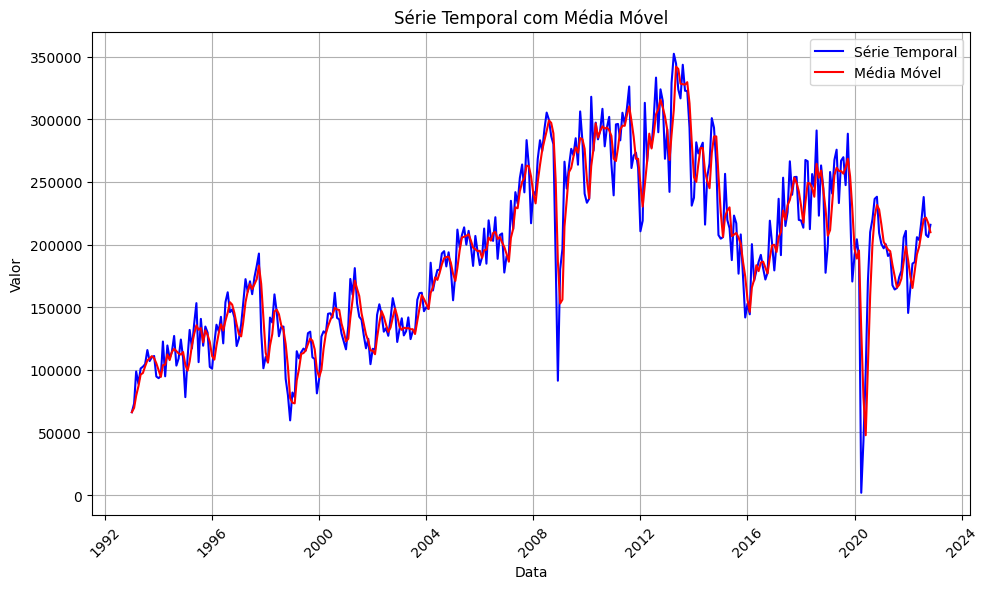

In [ ]:
df2['data'] = pd.to_datetime(df2['data'], format='%d/%m/%Y')

window = 3
df2['mavg'] = df2['valor'].rolling(window=window, min_periods=1).mean()

plt.figure(figsize=(10, 6))
plt.plot(df2['data'], df2['valor'], color='blue', label='Série Temporal')
plt.plot(df2['data'], df2['mavg'], color='red', label='Média Móvel')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.title('Série Temporal com Média Móvel')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()